### Distribution of different Parts of Speech in Regular and Non-Regular Articles

In this notebook, we will look at the distribution of different parts of speech in regular and non-regular articles. 

We would be looking at how many times different parts of speeches were used in an article. We first calulate a `Instance per article length` metric which evaluates the percentage of that POS appearing in the article. We then look at the distribution of `instance per article length` with the count of `articles` for both regular and non regular articles

To ensure that the distribution are comparable, we have undersampled the "Regular" class

Our general Hypothesis before this experiment is that the POS speech used in Regular and Non regular articles would be different

Let us first look at the different parts of speech detected. We use Spacy package from Python to conduct this experiment

**Different Parts of speech**

`ADJ` : adjective

`ADP` : adposition

`ADV` : adverb

`AUX` : auxiliary verb

`CONJ` : coordinating conjunction

`DET` : determiner

`INTJ` : interjection

`NOUN` : noun

`NUM` : numeral

`PART` : particle

`PRON` : pronoun

`PROPN` : proper noun

`PUNCT` : punctuation

`SCONJ` : subordinating conjunction

`SYM`: symbol

`VERB` : verb

`X` : other

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import json 
import time

In [0]:
#Reading the from the sample file created for the Exploratory data analysis. Change the location if necessary
file_loc = "/content/drive/My Drive/Bloomberg Editorial Classifier/data/collected/combined_data_sample.csv"
df = pd.read_csv(file_loc)
df.head()

,Unnamed: 0,source_name,url,created_date,tag,heading,author,article_text,label
0,0,Press Democrat,https://www.pressdemocrat.com/opinion/9747792-...,2019-06-29 00:00:00,"census, question, court, administration, citiz...",Guest Editorial: Time for Trump to give up on ...,NaN,\nThis editorial is from the Washington Post:T...,other
1,1,Press Democrat,https://www.pressdemocrat.com/opinion/9749911-...,2019-07-08 00:00:00,"restroom, square, public, loo, portland, won, ...",PD Editorial: Put a public restroom on Old Cou...,THE EDITORIAL BOARD,\nThe vehement opposition to a public restroom...,other
2,2,Press Democrat,https://www.pressdemocrat.com/opinion/9747085-...,2019-07-05 00:00:00,"california, challenges, clean, climate, fund, ...",Guest Editorial: California needs clean water,NaN,\nThis editorial is from Bloomberg Opinion:In ...,other
3,3,Press Democrat,https://www.pressdemocrat.com/opinion/editoria...,2019-07-02 00:00:00,"smart, crossing, sidewalks, pedestrians, train...",PD Editorial: Safe rail crossings are up to SM...,THE EDITORIAL BOARD,\nWhen a SMART train approaches Golf Course Dr...,other
4,4,Press Democrat,https://www.pressdemocrat.com/entertainment/bo...,2019-07-03 00:00:00,"library, fines, sonoma, county, libraries, boo...",PD Editorial: Libraries without fines? One mor...,THE EDITORIAL BOARD,\nLibrarians across the country \xe2\x80\x94 i...,other


In [0]:
#Collecting Part of speech
regular_pos_all = {'ADJ': [], 'ADP': [], 'ADV': [], 'AUX': [], 'CONJ': [], 
                   'DET': [], 'INTJ': [], 'NOUN': [], 'NUM': [], 'PART': [], 
                   'PRON': [], 'PROPN': [], 'PUNCT': [], 'SCONJ': [], 'SYM': [],
                   'VERB': [], 'X':[],'SPACE':[], 'CCONJ' : []}

op_pos_all = {'ADJ': [], 'ADP': [], 'ADV': [], 'AUX': [], 'CONJ': [], 'DET': [],
              'INTJ': [], 'NOUN': [], 'NUM': [], 'PART': [], 'PRON': [],
              'PROPN': [], 'PUNCT': [], 'SCONJ': [], 'SYM': [], 'VERB': [], 
              'X':[], 'SPACE':[], 'CCONJ' : []}

start_time = time.time()
for j, row in df.iterrows():
    nlp = spacy.load('en_core_web_sm')
    article = row['article_text']
    try:
        doc = nlp(article)
        regular_pos = {}
        op_pos = {}
        for token in doc:
            if row['label'] == 'regular':
                if token.pos_ not in regular_pos.keys():
                    regular_pos[token.pos_] = 1
                else:
                    regular_pos[token.pos_] +=1
            else:
                if token.pos_ not in op_pos.keys():
                    op_pos[token.pos_] = 1
                else:
                    op_pos[token.pos_] +=1

        for i in op_pos.keys():
            op_pos_all[i].append(op_pos[i]/len(doc))

        for i in regular_pos.keys():
            regular_pos_all[i].append(regular_pos[i]/len(doc))
        break
    
    except:
        print(j)
        continue
print("Time for execution = %s seconds ---" % round((time.time() - start_time),2))


Time for execution = 2074.33 seconds ---


In [0]:
# Saving to a json file for future reference
import json
with open('regular_pos_all.json', 'w') as fp:
    json.dump(regular_pos_all, fp)
with open('op_pos_all.json', 'w') as fp2:
    json.dump(op_pos_all, fp2)

In [0]:
# Read from json file which was saved - Execute from here for re-running the results

with open('regular_pos_all.json') as json_file:
    regular_pos_all = json.load(json_file)
with open('op_pos_all.json') as json_file:
    op_pos_all = json.load(json_file)

As some of the attributes are not that significant in our analysis, we drop them from the plot


We Drop the following POS


- `CONJ` : coordinating conjunction

- `SCONJ` : subordinating conjunction

- `SYM`: symbol

- `VERB` : verb

- `X` : other

In [0]:
#Preparing DataFrame for plotting from the dictionary
reg_pos_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in regular_pos_all.items() ]))
reg_pos_df = reg_pos_df.drop(columns=['CONJ', 'SCONJ', 'X', 'SYM', 'PUNCT'])

op_pos_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in op_pos_all.items() ]))
op_pos_df = op_pos_df.drop(columns=['CONJ', 'SCONJ', 'X', 'SYM', 'PUNCT'])

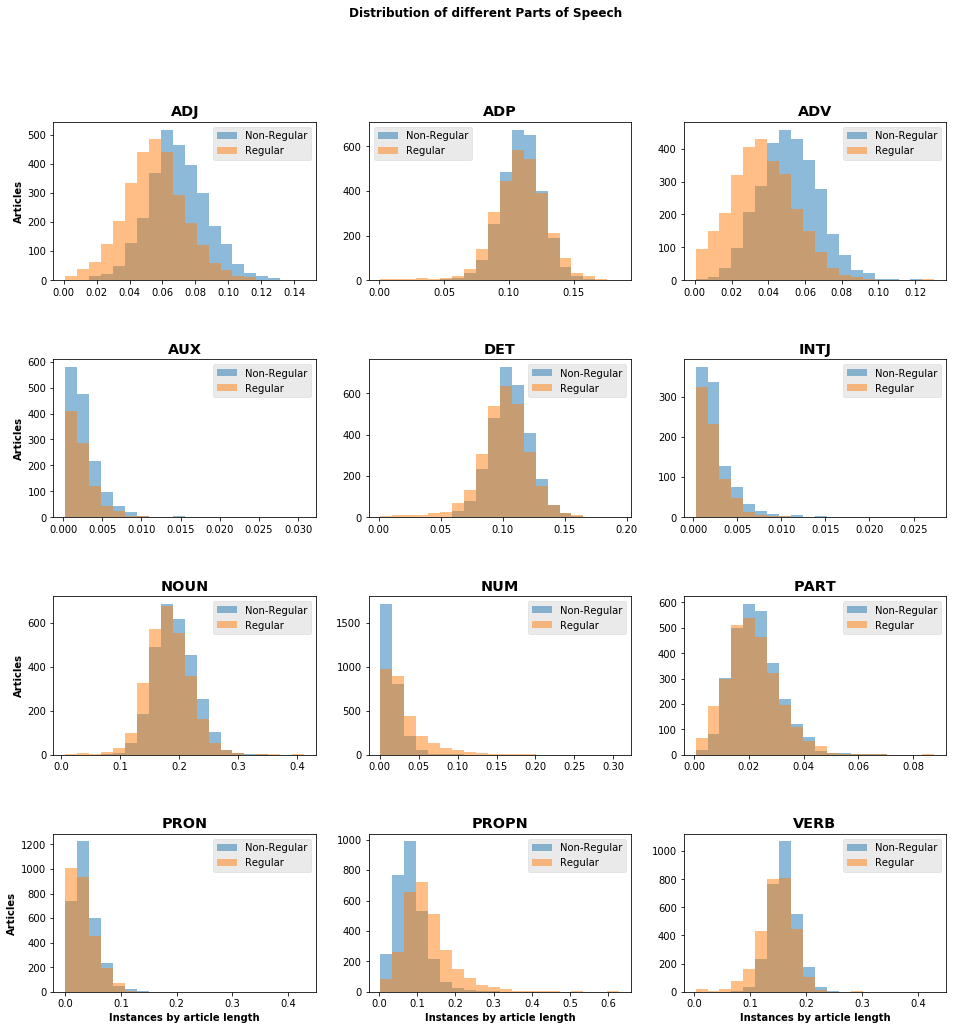

In [0]:
#Preparing the charts
fig, ax = plt.subplots(4,3, figsize=(16,16))
fig.suptitle('Distribution of different Parts of Speech', fontweight='bold')
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
pos = reg_pos_df.columns

for i in range(4):
    for j in range(3):
        bins = np.histogram(np.hstack((op_pos_df[pos[0]],
                                       reg_pos_df[pos[0]]))[~np.isnan(np.hstack((op_pos_df[pos[0]],
                                                                                      reg_pos_df[pos[0]])))], 
                            bins=20)[1] 
        _ = ax[i, j].hist(op_pos_df[pos[0]], alpha=0.5, bins = bins, label='Non-Regular')
        _ = ax[i, j].hist(reg_pos_df[pos[0]], alpha=0.5, bins = bins, label='Regular')
        _ = ax[i, j].set_title(pos[0], fontweight='bold')
        _ = ax[i, j].legend()
        
        pos = pos[1:]
    
_ = ax[3, 0].set_xlabel('Instances by article length', fontweight='bold')
_ = ax[3, 1].set_xlabel('Instances by article length', fontweight='bold')
_ = ax[3, 2].set_xlabel('Instances by article length', fontweight='bold')

_ = ax[0, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[1, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[2, 0].set_ylabel('Articles', fontweight='bold')
_ = ax[3, 0].set_ylabel('Articles', fontweight='bold')

**Results and observations**

Most of the Graphs follow a normal distribution, which was quite expected. But there are some striking differences in the distribution of parts of speech in the two classes:


- Parts of speech like `Adjective` and `Adverbs` seem to be used more frequently in Non-Regular Articles than in Regular Articles. This is probably because non regular articles (Editorials, Oped, Guest editorial) are generally more opionated than regular articles and are often are more of a "decriptive analysis" of the Nouns (Person/Topic of interest) and Verbs (Action of interest), than factual news items. Similarly, `Determiners`, `Particles`, `Nouns` and `Verbs` are slightly higher as well, but are not that significant

- On the other hand, `Numbers` and `Proper-Nouns` are on a higher side in  Regular Articles than in Non-Regular Articles. The explaination is quite obvious in case of `Numbers`, as Regular articles contain more factual information like numbers and quantities than Non-regular articles. It is not obvious in case of `Proper-Nouns`, but we believe that they have a higher share in the article text than in Non-regular news articles because Regular articles talk about a wide range of different (but related) 'subjects' in the same article, but Non-regular opinions do not have that wide of a range of subjects to talk about and stick to a same person of interest (probably the reason they have slightly more of `Pronouns` use than regylar articles). 



**Notes**

- Regular articles are taken as regular and the rest are characterised as "Non-Regular"

- The data for Regular articles is undersampled

- The bins in the charts are are left exclusive (i.e the first bin does not include the value 0), So all articles with count 0 for a particular part of speech will be discarded from the graph


